In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from arch import arch_model
from datetime import datetime

In [2]:
def get_data(tickers, start, end):
    """Fetch stock data for multiple tickers and compute log returns."""
    df = yf.download(tickers, start=start, end=end)['Close']
    log_returns = np.log(df / df.shift(1))
    log_returns.dropna(inplace=True)
    return df, log_returns

In [3]:
def fit_garch_multi(returns):
    """Fit GARCH(2,2) for each asset and get conditional volatilities."""
    volatilities = pd.DataFrame(index=returns.index, columns=returns.columns)
    models = {}
    for ticker in returns.columns:
        model = arch_model(returns[ticker] * 100, vol='Garch', p=2, q=2)  # Scale for stability
        res = model.fit(disp='off')
        models[ticker] = res
        volatilities[ticker] = res.conditional_volatility / 100  # Rescale back
    return models, volatilities

In [6]:
TICKERS = ['AAPL', 'MSFT', 'GOOGL']
START = datetime(2015, 1, 1)
END = datetime.today()

In [ ]:
prices, returns = get_data(TICKERS, START, END)
prices, returns

[*********************100%***********************]  3 of 3 completed


DatetimeIndex(['2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-12', '2015-01-13', '2015-01-14',
               '2015-01-15', '2015-01-16',
               ...
               '2025-07-31', '2025-08-01', '2025-08-04', '2025-08-05',
               '2025-08-06', '2025-08-07', '2025-08-08', '2025-08-11',
               '2025-08-12', '2025-08-13'],
              dtype='datetime64[ns]', name='Date', length=2668, freq=None)

In [13]:
_, volatilities = fit_garch_multi(returns)
volatilities

Ticker,AAPL,GOOGL,MSFT
Date,,,
2015-01-05,0.019926,0.015627,0.020880
2015-01-06,0.021372,0.016306,0.019652
2015-01-07,0.019601,0.017483,0.019125
2015-01-08,0.019130,0.015612,0.018108
2015-01-09,0.021960,0.016246,0.019905
...,...,...,...
2025-08-07,0.021379,0.017092,0.016699
2025-08-08,0.021435,0.013986,0.015532
2025-08-11,0.024453,0.017835,0.014946


In [15]:
import matplotlib.pyplot as plt

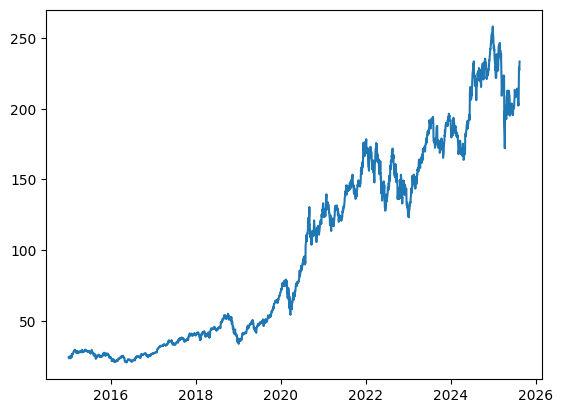

In [16]:
plt.plot(prices["AAPL"])

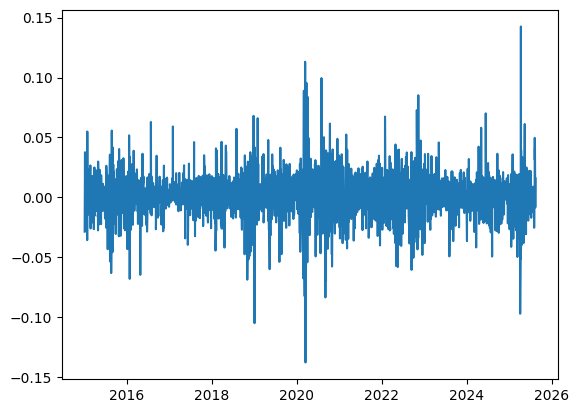

In [17]:
plt.plot(returns["AAPL"])

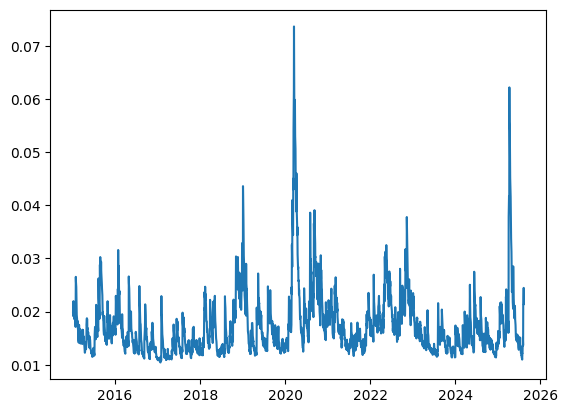

In [18]:
plt.plot(volatilities["AAPL"])